dropping 389 duplicates
(2891, 3)


<AxesSubplot:ylabel='Frequency'>

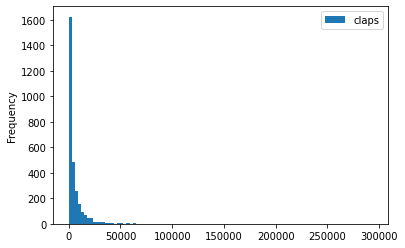

In [1]:
from src.create_dataset import *

dataset = load_jsonls('raw')
dataset = pd.DataFrame(dataset)
dataset.drop(['headline-raw', 'claps-raw'], axis=1, inplace=True)

dupes_mask = dataset.duplicated()
print(f'dropping {dupes_mask.sum()} duplicates')
dataset = dataset.loc[~dupes_mask, :]
print(dataset.shape)
import numpy as np
dataset.loc[:, 'log-claps'] = np.log(dataset['claps'])

import matplotlib.pyplot as plt
f, a = plt.subplots()
dataset.plot(ax=a, y='claps', kind='hist', bins=100)

In [9]:
dataset.loc[:, 'clip-claps'] = np.clip(dataset['claps'], a_min=0, a_max=80000)

dataset.plot('clip-claps')

<AxesSubplot:ylabel='Frequency'>

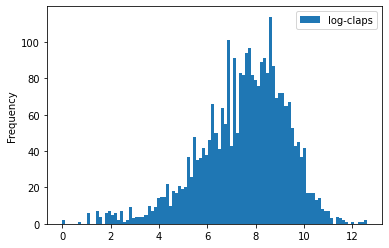

In [2]:
f, a = plt.subplots()
dataset.plot(ax=a, y='log-claps', kind='hist', bins=100)

In [6]:
pd.cut(dataset['claps'], bins=(0, 10000, 200000))

0            (0, 10000]
73           (0, 10000]
74      (10000, 200000]
75           (0, 10000]
76           (0, 10000]
             ...       
3275         (0, 10000]
3276         (0, 10000]
3277         (0, 10000]
3278         (0, 10000]
3279    (10000, 200000]
Name: claps, Length: 2891, dtype: category
Categories (2, interval[int64]): [(0, 10000] < (10000, 200000]]

Negative claps???

In [4]:
dataset.loc[dataset['claps'] < 0, :]

,headline,claps,site_id,log-claps


In [5]:
dataset['claps'].min()

1.0